In [1]:
%load_ext sql

In [2]:
%sql sqlite:///C:/sqlite/chinook2.db

# 1) Introduction

This lesson will focus on subqueries that yield several rows (several values or a list) or several columns (tables). Let's start with the ones that yield **several rows**.

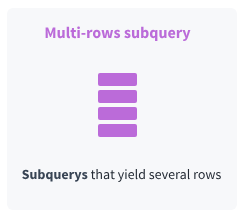

From the `media_type` table, we can see that media types 1 and 3 are `MPEG`.

| media_type_id | name                        |
|---------------|-----------------------------|
| 1             | MPEG audio file             |
| 2             | Protected AAC audio file    |
| 3             | Protected MPEG-4 video file |
| 4             | Purchased AAC audio file    |
| 5             | AAC audio file              |

We can count the tracks in the track table whose media type is MPEG with this query:

```sql
SELECT COUNT(*) AS tracks_tally
  FROM track
 WHERE media_type_id IN (1, 3);
```

## Instructions

In this exercise, we will use a subquery to count the tracks in the `track` table whose media type is `MPEG` using subqueries.

In [3]:
%%sql
SELECT COUNT(*) AS tracks_tally
  FROM track
 WHERE media_type_id IN 
       (SELECT media_type_id
        FROM media_type
        WHERE name LIKE '%MPEG%');

 * sqlite:///C:/sqlite/chinook2.db
Done.


tracks_tally
3248


# 2) Subqueries as Lists

The only differences between **scalar** and **multi-rows subqueries** are the following:

* Scalar subqueries return **only one value**, whereas multi-row subqueries return **several values** (e.g., the `media_type_id` type identifiers 1 & 3).

We use different operators for these subqueries. The commonly used operators for multi-row subqueries are IN and `NOT IN`

In general, we use multi-row subqueries as part of the conditions in `WHERE` and `HAVING` clauses.

Before we move on, let's bring back our schema diagram to refresh our memory:

![alt text](chinook_schema.svg)

## Instructions

1. Write a query to return customer invoices where the first name (`first_name`) starts with the letter `A`.

    * Select all columns from the invoice table.
    
     * Use the `IN` operator with a subquery to generate the customer identifiers whose first name starts with `A`.

    * Use the `LIKE` operator to check which first names start with `A`.

In [4]:
%%sql
SELECT *
  FROM invoice
  WHERE customer_id IN
       (SELECT customer_id
          FROM customer
         WHERE first_name LIKE 'A%')

 * sqlite:///C:/sqlite/chinook2.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
123,7,2017-09-23 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,11.879999999999999
225,7,2018-05-08 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,5.9399999999999995
251,7,2018-07-20 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,6.93
337,7,2019-04-03 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,9.9
410,7,2019-08-27 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,3.96
462,7,2019-12-29 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,8.91
472,7,2020-01-31 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,2.9699999999999998
488,7,2020-03-13 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,13.86
553,7,2020-08-26 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,4.95
135,11,2017-10-25 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,2.9699999999999998


# 3) NOT IN Operator

Moving on in our study, we can write a similar  to count the tracks whose media type is `Protected`

```sql
SELECT COUNT(*) AS tracks_tally
  FROM track
 WHERE media_type_id IN (SELECT media_type_id
                           FROM media_type
                          WHERE name LIKE 'Protected%');
```

Let's now count the tracks whose media type **is not protected.** Unfortunately, there is no pattern appearing to link the unprotected media types. In this case, we use the negation with `NOT`.

Here we have two solutions:

* Find the unprotected media with `NOT LIKE`.

```sql
SELECT COUNT(*) AS tracks_tally
  FROM track
 WHERE media_type_id IN (SELECT media_type_id
                           FROM media_type
                          WHERE name NOT LIKE 'Protected%');
```
* Find the tracks whose media types **are not in** the protected media list with the `NOT IN` operator.

```sql
SELECT COUNT(*) AS tracks_tally
  FROM track
 WHERE media_type_id NOT IN (SELECT media_type_id
                               FROM media_type
                              WHERE name LIKE 'Protected%');
```

## Instructions

1. Write a query to display the customer identifiers (`customer_id`) whose total purchase amount (sum of the `total` column) is **less than one hundred dollars**.

    * Use the `invoice` table.

    * We will use this query as a subquery in the next step.

1. Write a query to select the names (`first_name` and `last_name`) from the `customer` table where `customer_id` is **not in** the customer identifiers whose total purchase amount is less than a hundred dollars (the subquery from step 1).

In [7]:
%%sql
SELECT first_name, last_name
  FROM customer
 WHERE customer_id NOT IN
       (SELECT customer_id
          FROM invoice
         GROUP BY customer_id
         HAVING SUM(total) < 100)

 * sqlite:///C:/sqlite/chinook2.db
Done.


first_name,last_name
Luís,Gonçalves
František,Wichterlová
Helena,Holý
Fernanda,Ramos
João,Fernandes
Hugh,O'Reilly
Manoj,Pareek


# 4) Subqueries as Tables

We commonly use scalar and multi-row subqueries with the `SELECT`, `WHERE`, and `HAVING` clauses. It's also possible to use subqueries with the `FROM` clause if they yield tables. In this case, they are multi-column subqueries or subqueries as tables.

Let's assume we have the biggest sales per country from the invoice table and we want to compute the average of those sales. There is no way to do it using methods we've learned so far. We can do this with subqueries as tables.

```sql
SELECT AVG(billing_country_max) AS billing_country_max_avg
  FROM (SELECT billing_country, MAX(total) AS billing_country_max
          FROM invoice
         GROUP BY billing_country);
```

1. Step 1: Here is the original table.

| billing_country | total |
|-----------------|-------|
| USA             | 15.84 |
| Canada          | 9.90  |
| France          | 1.98  |
| USA             | 7.92  |
| USA             | 16.83 |

2. Step 2: The original table is aggregated finding the maximum for each country.

| billing_country | billing_country_max |
|-----------------|---------------------|
| Canada          | 9.90                |
| France          | 1.98                |
| USA             | 16.83               |

3. Step 3: The Step 2 table is aggregate finding the average of the maxima.

| billing_country_max_avg |
|-------------------------|
| 9.57                    |


## Instructions

1. Write a query to compute the average number of sales per billing city (`billing_city`)

Here's a breakdown:

* The subquery groups invoices by `billing_city` and counts the number of invoices in each city.

* The outer query then calculates the average of these counts, providing the desired result.



In [3]:
%%sql
SELECT AVG(billing_city_tally) as billing_city_tally_avg
  FROM (SELECT billing_city, COUNT(*) as billing_city_tally
          FROM invoice
      GROUP BY billing_city)

 * sqlite:///C:/sqlite/chinook2.db
Done.


billing_city_tally_avg
11.584905660377359


# 5) Multi-Column Subqueries and Joins

We use multi-column subqueries wherever we can use tables (especially with `FROM` and `joins`). On the previous screen, we learned how to use subqueries with the `FROM` clause. Let's now use them with `JOIN`.

As a reminder, the syntax of an inner join is the following.

```sql
SELECT *
  FROM a_table
  JOIN another_table
    ON a_table.some_id = another_table.some_id
```

We can use a multi-column subquery as `a_table` or `another_table`.

Let's practice by joining the **average purchase amount for each customer** with its **last and first names**. Here is the sample of the expected result:

| last_name | first_name | total_avg |
|-----------|------------|-----------|
| Gonçalves | Luís       | 8.376923  |
| Köhler    | Leonie     | 7.470000  |
| Tremblay  | François   | 11.110000 |



## Instructions

1. Write a query to generate the average purchase amount for each customer, then join this result with the `customer` table.


In [4]:
%%sql
SELECT c.last_name, c.first_name, i.total_avg
  FROM customer AS c
  JOIN (SELECT customer_id, AVG(total) AS total_avg
          FROM invoice
         GROUP BY customer_id) AS i
    ON c.customer_id = i.customer_id
limit 5;

 * sqlite:///C:/sqlite/chinook2.db
Done.


last_name,first_name,total_avg
Gonçalves,Luís,8.376923076923076
Köhler,Leonie,7.47
Tremblay,François,11.11
Hansen,Bjørn,8.03
Wichterlová,František,8.03


# 6) Join Multi-Columns Subqueries

We use multi-column subqueries wherever we can use tables (especially with FROM and joins). However, if we can use a multi-column subquery somewhere, we can also use joins there.

There are some cases when multi-column subqueries are necessary:

1. **To aggregate an (already) aggregated table (e.g., AVG of MAX)**

  ```sql
  SELECT AVG(billing_country_max) AS billing_country_max_avg
FROM (SELECT billing_country, MAX(total) AS billing_country_max
        FROM invoice
        GROUP BY billing_country);
  ```
2. **To join aggregate tables**

Let's assume we want to compute the average number of sales per country per customer (the number of sales per country divided by the number of customers in that country). We have the following two queries that we want to join to get this result: 

  * the first computes the number of sales per country,

  ```sql
  SELECT billing_country, COUNT(*) AS invoice_tally
  FROM invoice
 GROUP BY billing_country;
 ```
  
  * the second computes the number of customers per country.

  ```sql
  SELECT country, COUNT(*) AS customer_tally
  FROM customer
 GROUP BY country;
 ```



## Instructions

1. Write a query to join the last two queries provided in the learning section.

* You should name the first subquery table `i`.

* You should name the second subquery table `ct`.

* Select the country and the average number of sales per country per customer.

    * Rename the country column `country`.

    * Rename the average number of sales per country per customer as `sale_avg_tally`.

* Arrange `sale_avg_tally` in descending order.

## Understading

1. First select country and the division of country_count / customer_country

2. from table i

3. join with table ct

4. order by sale_avg by descending order

In [5]:
%%sql
SELECT i.country,
       (i.invoice_tally/ct.customer_tally) as sale_avg_tally
  FROM (SELECT billing_country as country, COUNT(*) AS invoice_tally
          FROM invoice
         GROUP BY billing_country) AS i
  JOIN (SELECT country, COUNT(*) AS customer_tally
         FROM customer
        GROUP BY country) as ct
    ON i.country = ct.country
 ORDER BY sale_avg_tally DESC
     

 * sqlite:///C:/sqlite/chinook2.db
Done.


country,sale_avg_tally
Czech Republic,15
Portugal,14
Chile,13
Ireland,13
Brazil,12
Finland,11
Spain,11
Australia,10
Denmark,10
France,10
